In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Zadanie 1

In [5]:
df = pd.read_csv("beer.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
df[["Temperatura Maxima (C)", "Temperatura Minima (C)"]]

,Temperatura Maxima (C),Temperatura Minima (C)
0,"32,5","23,9"
1,"33,5","24,5"
2,"29,9","22,4"
3,"28,6","21,5"
4,"28,3",21
...,...,...
936,NaN,NaN
937,NaN,NaN
938,NaN,NaN
939,NaN,NaN


In [ ]:
df.keys()

In [19]:
type_change = ['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)']

for e in type_change:
    df[e] = df[e].str.replace(',', '.').astype(np.float)
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


In [6]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
df.isnull().sum(axis = 0)

In [9]:
df.shape

(941, 7)

In [ ]:
df.isnull().sum().sum()

In [6]:
df = df.dropna(how = "all")
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


### Zadanie 2

In [21]:
x1 = np.array(df['Consumo de cerveja (litros)'])
y1 = np.array(df['Precipitacao (mm)'])

x2 = np.array(df['Consumo de cerveja (litros)'])
y2 = np.array(df['Temperatura Media (C)'])

x3 = np.array(df['Temperatura Maxima (C)'])
y3 = np.array(df['Consumo de cerveja (litros)'])

In [ ]:
x1

In [16]:
def fun_lin(a,b,x):
    return a*x + b

In [17]:
def lin_reg(x,y, x_label, y_label):
    model = LinearRegression()
    
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    
    model.fit(x, y)
    
    b = model.intercept_ 
    a = model.coef_
    
    yReg = fun_lin(a,b,x)
    
    print("r2_wartość = ", r2_score(y, yReg))
    
    fig = plt.figure(figsize=(8,8))
    plt.plot(x, y, linestyle = 'none', marker = 'o',
             markersize = 5, label = 'values') 
    plt.plot(x,yReg, label = 'regression')
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    plt.legend()

r2_wartość =  0.037552356536804554


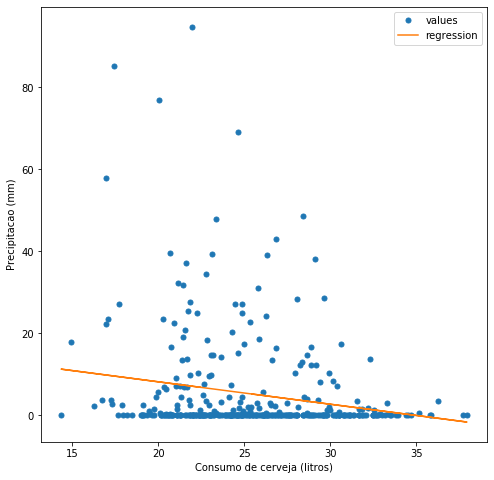

In [22]:
lin_reg(x1,y1, 'Consumo de cerveja (litros)', 'Precipitacao (mm)')

## W oparciu o wartość wskaźnika r2 można wnioskować o znikomej korelacji między ilościa spożytego piwa, a opadami

r2_wartość =  0.33018204933243234


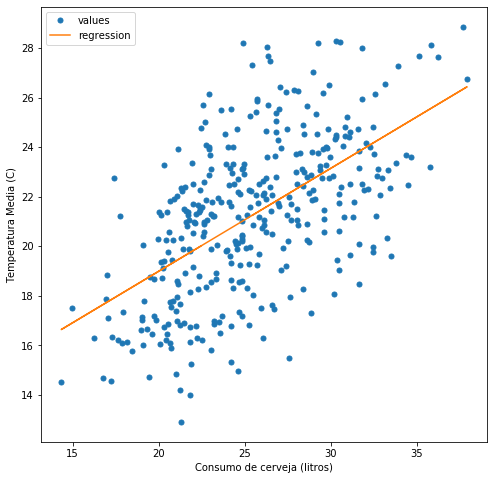

In [23]:
lin_reg(x2, y2, 'Consumo de cerveja (litros)', 'Temperatura Media (C)')

## W oparciu o wartość wskaźnika r2 można wnioskować o mało znaczącej, wszak występującej korelacji między ilościa spożytego piwa, a średnią temperaturą

r2_wartość =  0.413027909953363


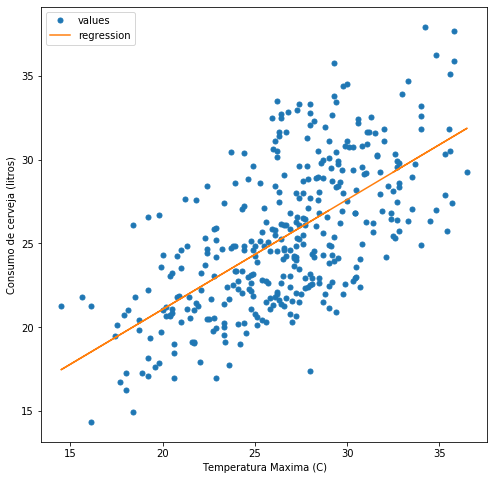

In [24]:
lin_reg(x3, y3, 'Temperatura Maxima (C)', "Consumo de cerveja (litros)")

## W oparciu o wartość wskaźnika r2 można wnioskować o średniej korelacji między ilościa spożytego piwa, a maksymalną temperaturą

### Zadanie 3

#### Regresja logistyczna i drzewo decyzyjne

In [29]:
Y = np.array(df['Final de Semana']).astype(int)

In [27]:
X1 = np.array(df['Temperatura Minima (C)']).reshape(-1,1)
X2 = np.array(df['Temperatura Media (C)']).reshape(-1,1)
X3 = np.array(df['Temperatura Maxima (C)']).reshape(-1,1)
X4 = np.array(df['Consumo de cerveja (litros)']).reshape(-1,1)

X_1 = np.concatenate((X1,X2), axis = 1)
X_2 = np.concatenate((X1, X2, X3), axis = 1)
X_3 = np.concatenate((X1, X2, X3, X4), axis = 1)

In [25]:
def regl_tree_comparison (x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=33)
    
    modelReg = LogisticRegression()
    modelReg.fit(x_train, y_train)
    print("Regl: ")
    
    regl_train_score = modelReg.score(x_train, y_train)
    print("train score: ", regl_train_score)
    
    y_regl_pred = modelReg.predict(x_test)
    regl_accurac = accuracy_score(y_test, y_regl_pred)
    print("accuracy score: ", regl_accurac)
    
    modelDtree = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy')
    modelDtree.fit(x_train, y_train)
    print("DTree: ")
    
    dtree_train_score = modelDtree.score(x_train, y_train)
    print("train score: ", dtree_train_score)
    
    y_dtree_pred = modelDtree.predict(x_test)
    dtree_accurac = accuracy_score(y_test, y_dtree_pred)
    print("accuracy score: ", dtree_accurac)
    
    

In [30]:
regl_tree_comparison(X_1, Y) # dla dwoch cech

Regl: 
train score:  0.7131147540983607
accuracy score:  0.71900826446281
DTree: 
train score:  0.7827868852459017
accuracy score:  0.6942148760330579


In [104]:
regl_tree_comparison(X_2, Y) # dla trzech cech

Regl: 
train score:  0.7131147540983607
accuracy score:  0.71900826446281
DTree: 
train score:  0.7909836065573771
accuracy score:  0.6776859504132231


In [105]:
regl_tree_comparison(X_3, Y) # dla czterech cech

Regl: 
train score:  0.889344262295082
accuracy score:  0.8347107438016529
DTree: 
train score:  0.9877049180327869
accuracy score:  0.7520661157024794
